### Importing Libraries

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import datetime as dt

import warnings
warnings.filterwarnings("ignore")

### Loading Dataset

In [10]:
df = pd.read_csv("walmart_dataset.csv")

In [11]:
df.head(10)

,Order ID,Order Date,Ship Date,Customer Name,Country,City,State,Category,Product Name,Sales,Quantity,Profit
0,CA-2013-138688,6/13/2013,6/17/2013,Darrin Van Huff,United States,Los Angeles,California,Labels,Self-Adhesive Address Labels for Typewriters b...,14.62,2.0,6.87
1,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.86,7.0,14.17
2,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Art,Newell 322,7.28,4.0,1.97
3,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Mitel 5320 IP Phone VoIP phone,907.15,4.0,90.72
4,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Binders,DXL Angle-View Binders with Locking Rings by S...,18.50,3.0,5.78
5,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.90,5.0,34.47
6,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Tables,Chromcraft Rectangular Conference Tables,1706.18,9.0,85.31
7,CA-2011-115812,6/9/2011,6/14/2011,Brosina Hoffman,United States,Los Angeles,California,Phones,Konftel 250 ConferenceÂ phoneÂ - Charcoal black,911.42,4.0,68.36
8,CA-2013-161389,12/6/2013,12/11/2013,Irene Maddox,United States,Seattle,Washington,Binders,Fellowes PB200 Plastic Comb Binding Machine,407.98,3.0,132.59
9,CA-2011-167164,5/13/2011,5/15/2011,Alejandro Grove,United States,West Jordan,Utah,Storage,Fellowes Super Stor/Drawer,55.50,2.0,9.99


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3203 entries, 0 to 3202
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Order ID       3203 non-null   object 
 1   Order Date     3203 non-null   object 
 2   Ship Date      3203 non-null   object 
 3   Customer Name  3203 non-null   object 
 4   Country        3203 non-null   object 
 5   City           3203 non-null   object 
 6   State          3203 non-null   object 
 7   Category       3203 non-null   object 
 8   Product Name   3203 non-null   object 
 9   Sales          3203 non-null   float64
 10  Quantity       3203 non-null   float64
 11  Profit         3203 non-null   float64
dtypes: float64(3), object(9)
memory usage: 300.4+ KB


+ Dataset has no null values
+ Dataset has 12 columns (3 object type data and 9 Float type data) and 3203 rows

In [13]:
df.describe()

,Sales,Quantity,Profit
count,3203.000000,3203.000000,3203.000000
mean,226.493266,3.828910,33.849138
std,524.876911,2.260947,174.109155
min,0.990000,1.000000,-3399.980000
25%,19.440000,2.000000,3.850000
50%,60.840000,3.000000,11.170000
75%,215.810000,5.000000,33.000000
max,13999.960000,14.000000,6719.980000


+ Some products are priced at 0.99 which might be incorrect.

+ Certain products are causing a loss of 3399.98 in profit.

### Categories  that contribute the most to the company's profit margin.

In [14]:
P = df.groupby("Category")["Profit"].sum().sort_values(ascending=False)
P

Category
Copiers        19327.25
Accessories    16484.62
Binders        16096.78
Paper          12119.10
Phones          9111.06
Storage         8645.49
Appliances      8261.29
Furnishings     7641.26
Chairs          4027.62
Art             2374.15
Labels          2303.07
Envelopes       1908.71
Tables          1482.54
Supplies         626.11
Fasteners        275.19
Machines        -618.95
Bookcases      -1646.50
Name: Profit, dtype: float64

### Top 20% of customers who contribute the most to the overall sales revenue.

In [17]:
top_sales = df.groupby("Customer Name")["Sales"].sum().sort_values(ascending=False).head(int(3203*20/100))
top_sales.index

Index(['Raymond Buch', 'Ken Lonsdale', 'Edward Hooks', 'Jane Waco',
       'Karen Ferguson', 'Nick Crebassa', 'Clay Ludtke', 'Yana Sorensen',
       'Nora Preis', 'William Brown',
       ...
       'Denise Leinenbach', 'John Grady', 'Chris McAfee', 'Joy Smith',
       'Delfina Latchford', 'Darrin Van Huff', 'Jennifer Jackson',
       'Theone Pippenger', 'Carlos Meador', 'Jennifer Patt'],
      dtype='object', name='Customer Name', length=640)

[array([['CA-2013-109953', '7/15/2013', '7/19/2013', 'Raymond Buch',
         'United States', 'San Francisco', 'California', 'Phones',
         'Panasonic Kx-TS550', 110.38, 3.0, 12.42],
        ['CA-2013-109953', '7/15/2013', '7/19/2013', 'Raymond Buch',
         'United States', 'San Francisco', 'California', 'Appliances',
         'Holmes 99% HEPA Air Purifier', 151.62, 7.0, 50.03],
        ['CA-2013-109953', '7/15/2013', '7/19/2013', 'Raymond Buch',
         'United States', 'San Francisco', 'California', 'Furnishings',
         'Deflect-O Glasstique Clear Desk Accessories', 30.8, 4.0, 10.16],
        ['CA-2014-140151', '3/24/2014', '3/26/2014', 'Raymond Buch',
         'United States', 'Seattle', 'Washington', 'Storage',
         'Acco Perma 4000 Stacking Storage Drawers', 32.48, 2.0, 4.87],
        ['CA-2014-140151', '3/24/2014', '3/26/2014', 'Raymond Buch',
         'United States', 'Seattle', 'Washington', 'Paper', 'Xerox 1898',
         20.04, 3.0, 9.62],
        ['CA-2014-14

### Is there a trend in sales over time?

In [25]:
import datetime as dt

In [26]:
df["Order Date"] = pd.to_datetime(df["Order Date"],errors="coerce",format = "%m/%d/%Y")

In [27]:
df["month"] = df["Order Date"].dt.month

In [28]:
df["year"] = df["Order Date"].dt.year

In [29]:
data = df.groupby(["year","month"])[["Sales","Profit"]].sum().reset_index()

In [30]:
data.columns

Index(['year', 'month', 'Sales', 'Profit'], dtype='object')

<Axes: xlabel='month', ylabel='Sales'>

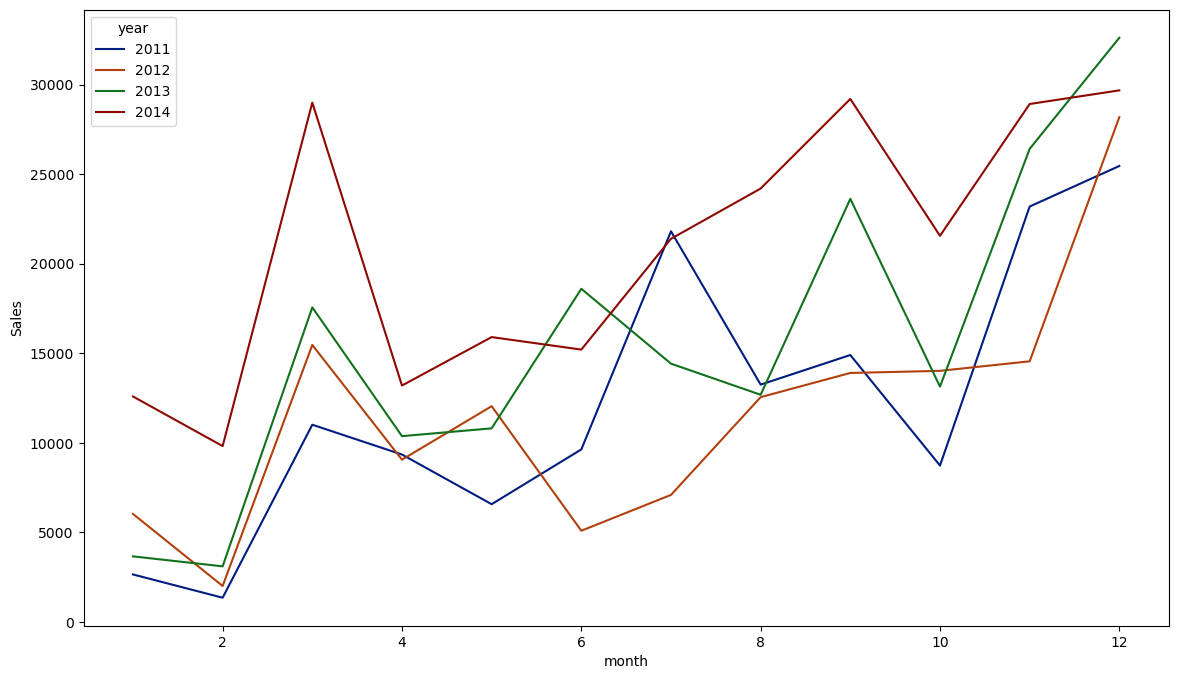

In [31]:
plt.figure(figsize=(14,8))
sns.lineplot(x=data["month"],y=data["Sales"],hue=data["year"],palette="dark")

### Average time taken to fulfill an order 


In [32]:
df["Ship Date"] = pd.to_datetime(df["Ship Date"],errors="coerce", format = "%m/%d/%Y")

In [33]:
df["days"] = df["Ship Date"] - df["Order Date"]

In [34]:
df["days"]

0      4 days
1      5 days
2      5 days
3      5 days
4      5 days
        ...  
3198   4 days
3199   5 days
3200   5 days
3201   5 days
3202   5 days
Name: days, Length: 3203, dtype: timedelta64[ns]

In [35]:
df.days.mean()

Timedelta('3 days 22:19:17.664689353')

### What are the top 10 cities in terms of total sales revenue ?

In [36]:
df2 = df.groupby("City").agg({"Sales": "sum", "Customer Name" : "nunique"}).sort_values(by="Sales",ascending=False)

In [37]:
df2

,Sales,Customer Name
City,,
Los Angeles,175851.33,304
Seattle,119540.74,188
San Francisco,112669.09,232
San Diego,47521.05,86
Denver,12198.78,17
...,...,...
Billings,8.29,1
Layton,4.96,1
Auburn,4.18,1


###  Sales vs Category

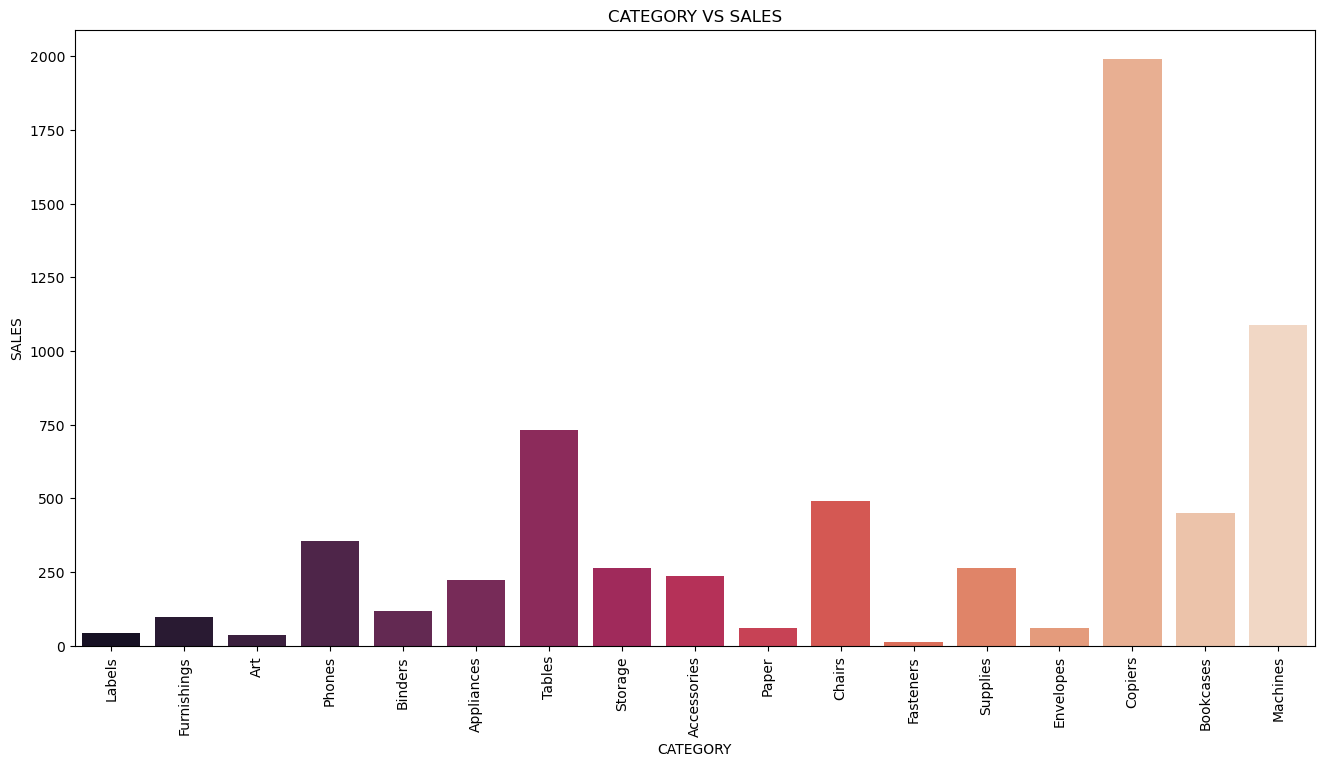

In [38]:
plt.figure(figsize=(16,8))
sns.barplot(data=df,x="Category",y="Sales",palette="rocket",ci=False)
plt.xlabel("CATEGORY")
plt.ylabel("SALES")
plt.title("CATEGORY VS SALES")
plt.xticks(rotation=90)
plt.show()

### Yearly  Categorical sales 

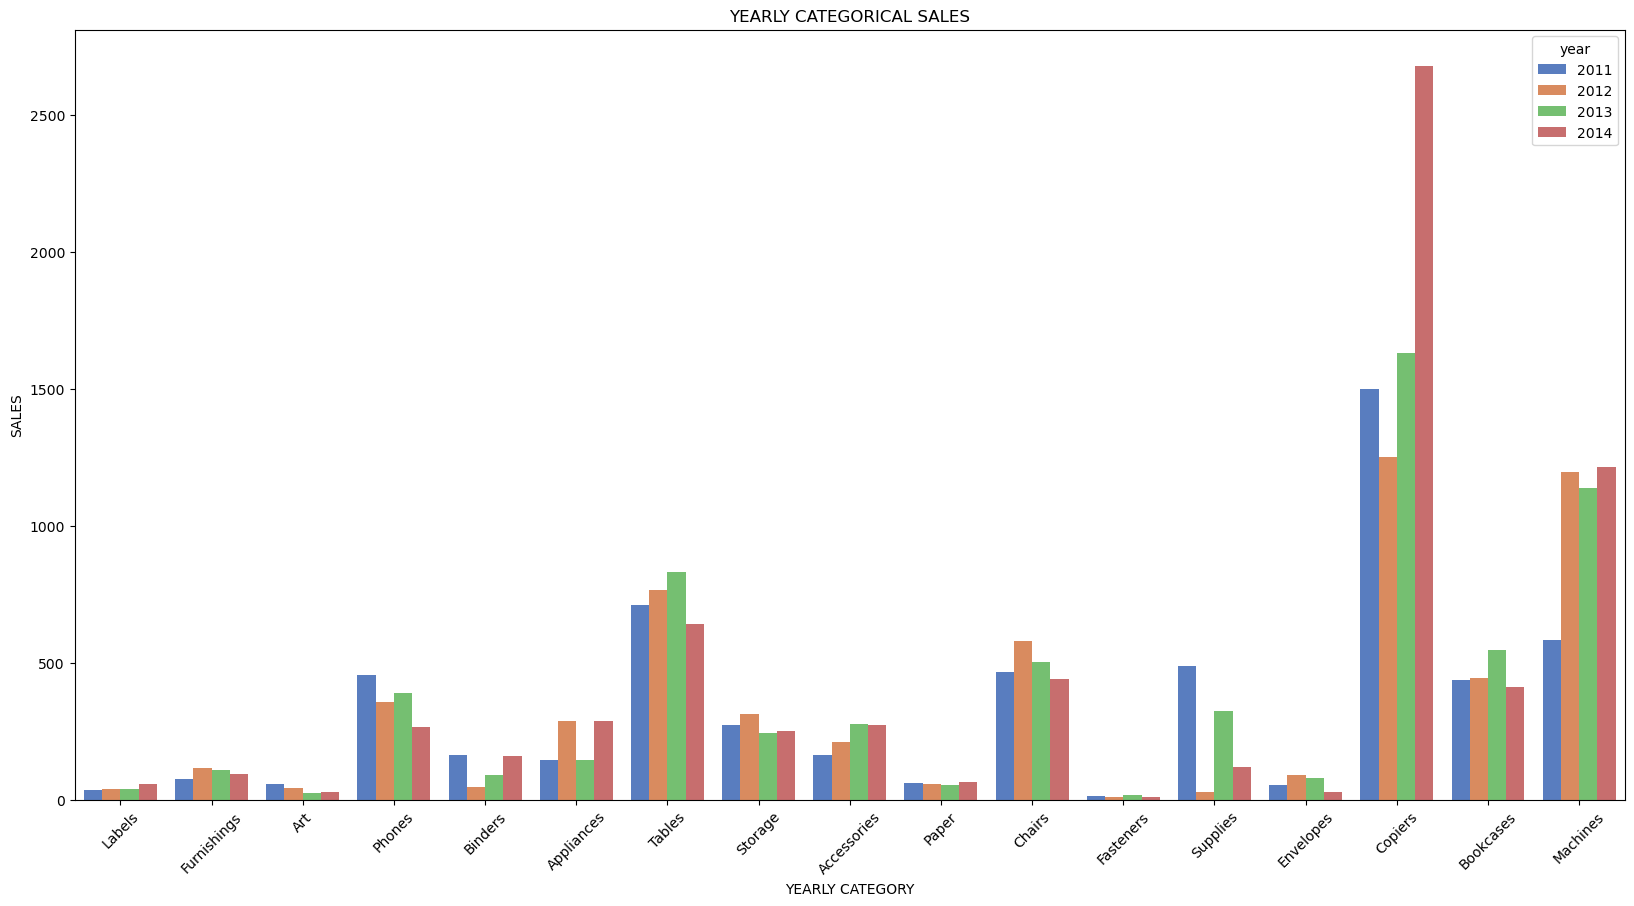

In [39]:
plt.figure(figsize=(20,10))
sns.barplot(data=df,x="Category",y="Sales",hue="year",palette="muted",ci=False)
plt.xlabel("YEARLY CATEGORY")
plt.ylabel("SALES")
plt.title("YEARLY CATEGORICAL SALES")
plt.xticks(rotation=45)
plt.show()

### Correlation

In [40]:
data1 = df[["Sales","Profit","Quantity","year"]]

<Axes: >

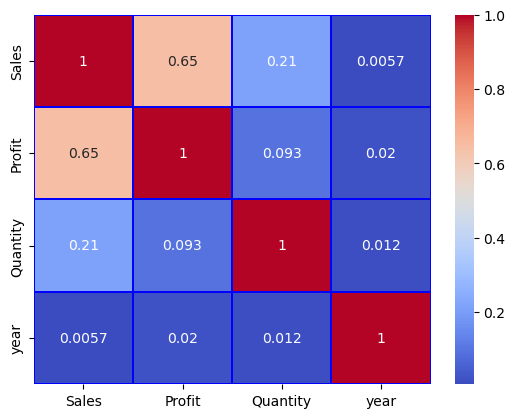

In [41]:
sns.heatmap(data1.corr(),annot=True,cmap="coolwarm",linecolor="blue",linewidth=0.2)